In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import linregress
import statistics
import seaborn as sns
import plotly.express as px

In [10]:
#data = pd.read_excel("sample_data//Test.xlsx")
#data = pd.read_csv("sample_data//valeursfoncieres-2022.txt",sep="|")
#data = pd.read_excel("Test.xlsx")
data1 = pd.read_csv("/valeursfoncieres-2022.txt",sep="|")
data2 = pd.read_csv("/valeursfoncieres-2019.txt",sep="|")
#print(data1.columns)
data1.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','5 Articles CGI','No disposition'],axis=1, inplace=True)
print(data1)

#print(data2.columns)
data2.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','5 Articles CGI','No disposition'],axis=1, inplace=True)
#print(data2)

# Sélection de 10000 lignes aléatoires
data1_sample = data1.sample(n=100000, random_state=1)
data2_sample = data2.sample(n=100000, random_state=1)
data1_sample['Valeur fonciere'] = data1_sample['Valeur fonciere'].str.replace(',', '.').astype(float)
data2_sample['Valeur fonciere'] = data2_sample['Valeur fonciere'].str.replace(',', '.').astype(float)

<ipython-input-10-b23586999d21>:4: DtypeWarning: Columns (24,26,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("/valeursfoncieres-2022.txt",sep="|")
<ipython-input-10-b23586999d21>:5: DtypeWarning: Columns (24,26,28,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("/valeursfoncieres-2019.txt",sep="|")


       Date mutation                     Nature mutation Valeur fonciere  \
0         03/01/2022                               Vente        55000,00   
1         03/01/2022                               Vente       143000,00   
2         03/01/2022                               Vente       143000,00   
3         03/01/2022                               Vente       143000,00   
4         04/01/2022                               Vente          300,00   
...              ...                                 ...             ...   
175427    29/03/2022  Vente en l'état futur d'achèvement       251240,00   
175428    31/03/2022                               Vente        55000,00   
175429    31/03/2022                               Vente        55000,00   
175430    31/03/2022                               Vente        55000,00   
175431           NaN                                 NaN             NaN   

        No voie B/T/Q Type de voie Code voie            Voie  Code postal  \
0         

In [11]:
data1["Surface terrain"] = data1["Surface terrain"].apply(lambda x: str(x).replace(',', '.'))
data1["Valeur fonciere"] = data1["Valeur fonciere"].apply(lambda x: str(x).replace(',', '.'))

data1["Section"] = data1["Section"].astype(str)
surfaceterrain = data1["Surface terrain"].dropna()
surfaceterrain = surfaceterrain.astype(float)
valeurfonciere = data1["Valeur fonciere"].dropna()
valeurfonciere = valeurfonciere.astype(float)
data1["PrixFloat"] = data1["Valeur fonciere"].astype(float).fillna(0)
data1["PrixInt"] = data1["PrixFloat"].astype(int)
data1["Surface terrain"] = data1["Surface terrain"].astype(float)

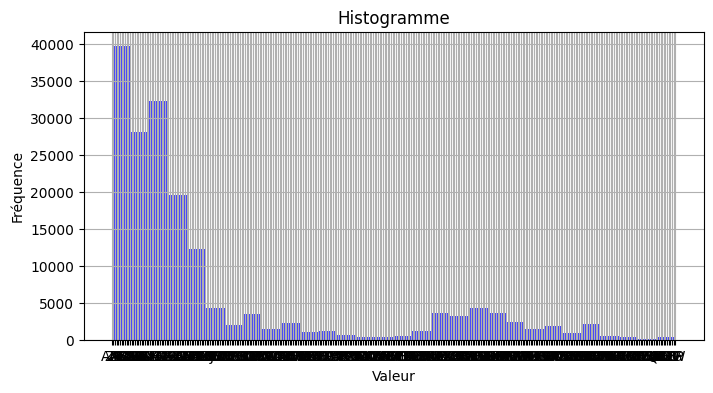

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(data1["Section"], bins=30, alpha=0.75, color='blue')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.title('Histogramme')
plt.grid(True)
plt.show()

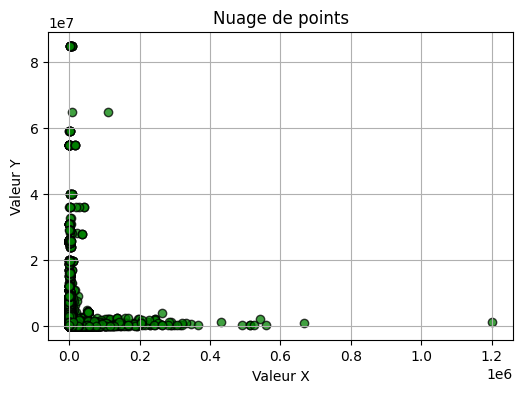

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(surfaceterrain, valeurfonciere, alpha=0.75, color='green', edgecolors='black')
plt.xlabel('Valeur X')
plt.ylabel('Valeur Y')
plt.title('Nuage de points')
plt.grid(True)
plt.show()

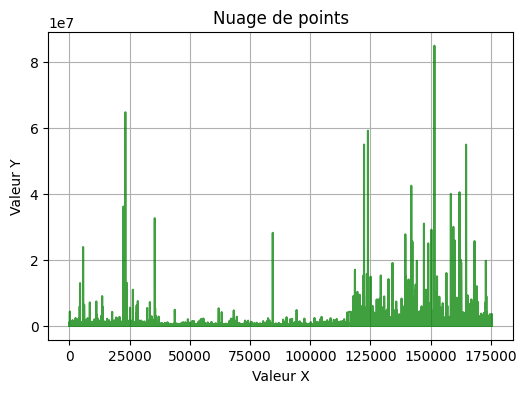

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(valeurfonciere, alpha=0.75, color='green')
plt.xlabel('Valeur X')
plt.ylabel('Valeur Y')
plt.title('Nuage de points')
plt.grid(True)
plt.show()

In [15]:
date = pd.to_datetime(data1['Date mutation'], format="%d/%m/%Y")
month = date.dt.month
data1["Date"] = date
data1["Month"] = month
data1["Days"] = date.dt.day
print(month)

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
175427    3.0
175428    3.0
175429    3.0
175430    3.0
175431    NaN
Name: Date mutation, Length: 175432, dtype: float64


In [16]:
data1.sort_values(by='Date', inplace=True)
print(data1)

       Date mutation Nature mutation Valeur fonciere  No voie B/T/Q  \
0         03/01/2022           Vente        55000.00     13.0   NaN   
35868     03/01/2022           Vente      3026054.00   9011.0   NaN   
35869     03/01/2022           Vente      3026054.00   9011.0   NaN   
35870     03/01/2022           Vente      3026054.00   9011.0   NaN   
765       03/01/2022           Vente       135017.00     67.0   NaN   
...              ...             ...             ...      ...   ...   
69778     30/12/2022           Vente        84000.00      6.0   NaN   
35560     30/12/2022           Vente         7710.00      NaN   NaN   
160648    31/12/2022           Vente       220600.00     25.0   NaN   
70304     31/12/2022           Vente        45000.00      7.0   NaN   
175431           NaN             NaN             nan      NaN   NaN   

       Type de voie Code voie             Voie  Code postal          Commune  \
0               RUE      2280    DE LA LIBERTE       1000.0  BOURG-

[nan nan]
 
nan x + nan
nan
nan


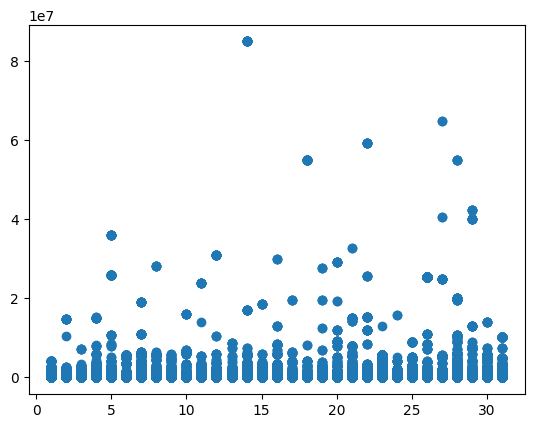

In [17]:
coefficients = np.polyfit(data1["PrixInt"], data1["Days"], 1)
print(coefficients)
polynome = np.poly1d(coefficients)
print(polynome)
# Générer la ligne de régression linéaire à partir des coefficients
y_regression = polynome(data1["PrixInt"])


#CALCUL DE L'ERREUR
def Calculderreur(polynome):
    somme = 0 
    for i in range(len(data1["PrixInt"])):
        somme += (data1['PrixInt'][i]-polynome(data1["Days"][i]))**2
    somme /= len(data1["Days"])
    return somme
print(Calculderreur(polynome))
print(Calculderreur(np.poly1d([2,10])))
plt.plot(data1["Days"], y_regression, color='red')
plt.scatter(data1["Days"],data1["PrixInt"])
plt.show()

In [18]:
print("Prix moyen : ",data1["PrixInt"].mean())
departement = data1["Code departement"].drop_duplicates()
print("Liste des département : ",departement)
for i in departement:
    listedesprix = []
    for j in range(len(data1["Code departement"])):
      if(str(data1["Code departement"][j]) == str(i)):
        listedesprix.append(data1["PrixFloat"][j])
    print("Prix moyen pour le département "+str(i)+" : ",statistics.mean(listedesprix))


Prix moyen :  399452.14450043323
Liste des département :  0         1.0
35868     2.0
116817    6.0
101742    4.0
73613     3.0
107559    5.0
175431    NaN
Name: Code departement, dtype: float64
Prix moyen pour le département 1.0 :  320872.02829383756
Prix moyen pour le département 2.0 :  137763.27904533918
Prix moyen pour le département 6.0 :  739792.2626668827
Prix moyen pour le département 4.0 :  193520.01644298687
Prix moyen pour le département 3.0 :  137934.70678535977
Prix moyen pour le département 5.0 :  541602.0325491892
Prix moyen pour le département nan :  0.0


In [19]:
def average_price_by_road_type(dept_data1):
    # Sélectionner les 5 types de voie les plus fréquents
    top_5_road_types = dept_data1['Type de voie'].value_counts().nlargest(5).index

    # Filtrer les données pour inclure uniquement les 5 types de voie les plus fréquents
    filtered_dept_data1 = dept_data1[dept_data1['Type de voie'].isin(top_5_road_types)]

    # Calculer les prix moyens pour les 5 types de voie les plus fréquents
    average_prices = filtered_dept_data1.groupby('Type de voie')['PrixFloat'].mean()
    return average_prices

ValueError: ignored

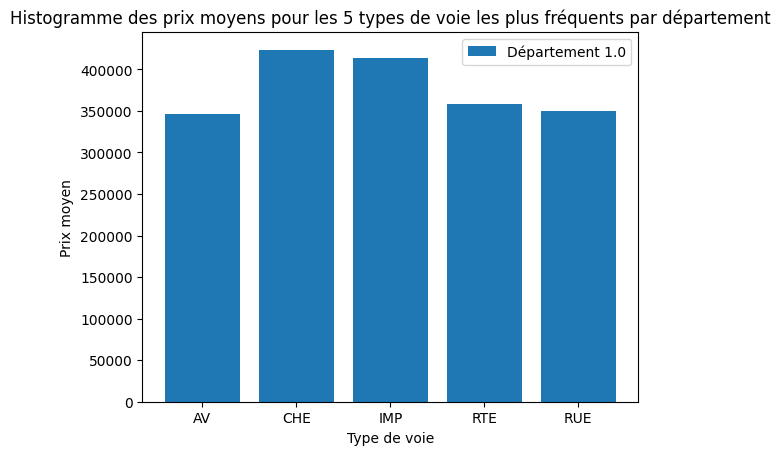

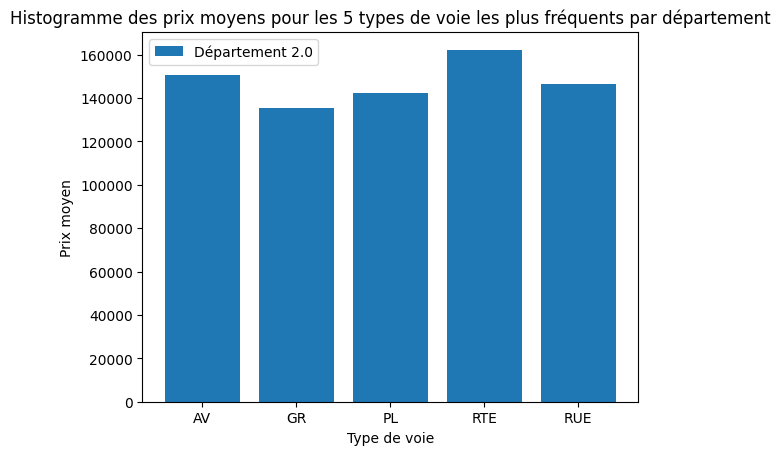

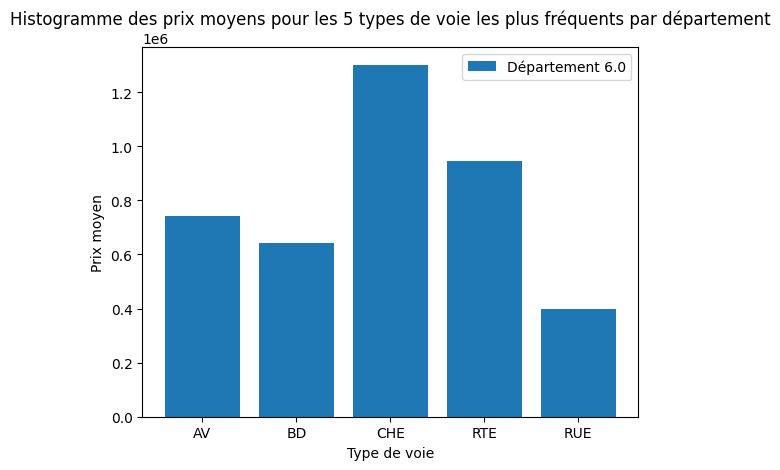

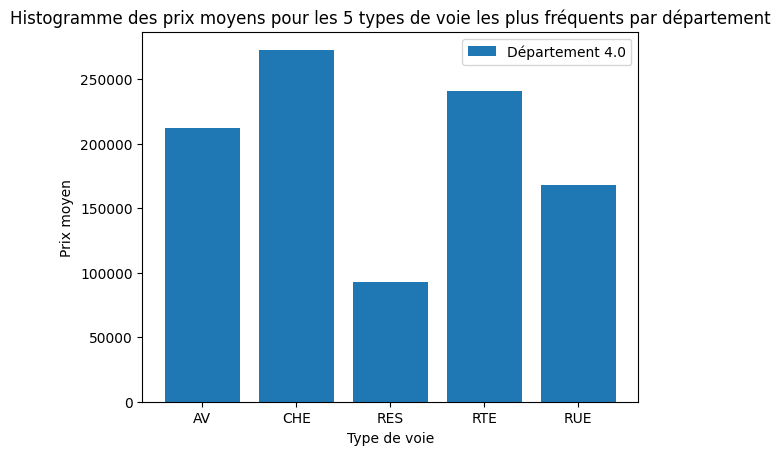

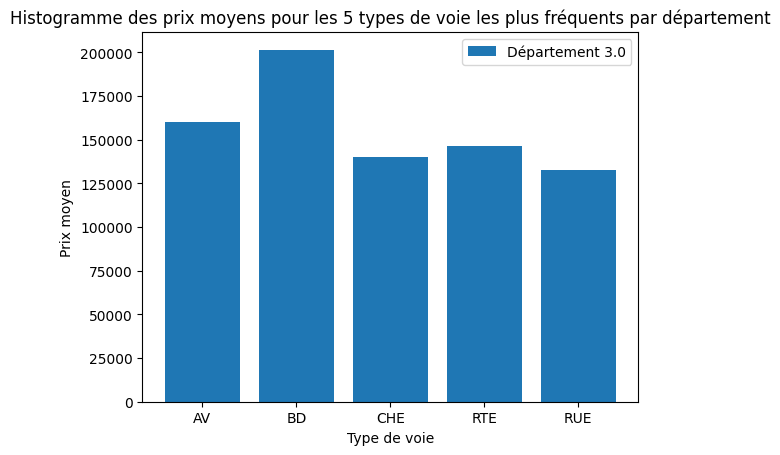

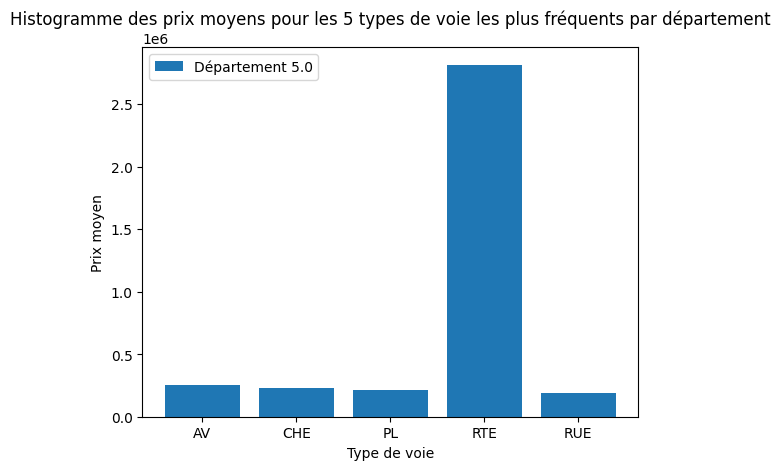

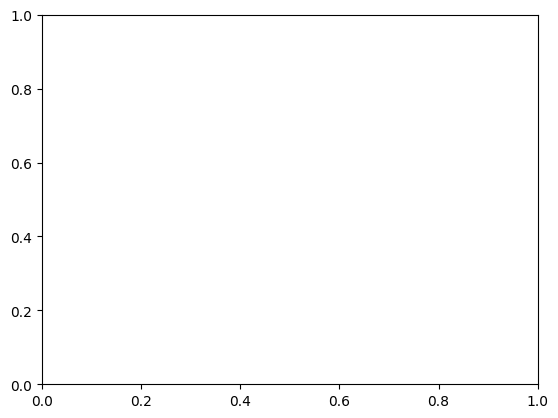

In [22]:
# Parcourir chaque département et tracer l'histogramme des prix moyens par type de voie
for j in departement:
    fig, ax = plt.subplots()
    dept_data = data1[data1['Code departement'] == int(j)]
    average_prices = average_price_by_road_type(dept_data)
    
    # Tracer l'histogramme des prix moyens pour le département actuel
    ax.bar(average_prices.index, average_prices, label=f'Département {j}')

    # Configurer les étiquettes des axes et le titre
    ax.set_xlabel("Type de voie")
    ax.set_ylabel("Prix moyen")
    ax.set_title("Histogramme des prix moyens pour les 5 types de voie les plus fréquents par département")

    # Ajouter une légende
    ax.legend()

    # Afficher le graphique
plt.show()

{}


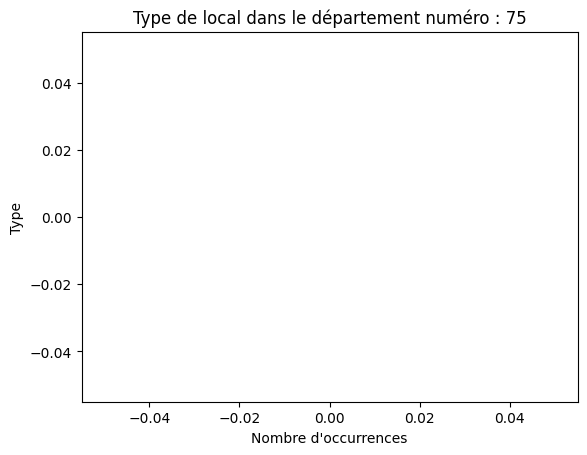

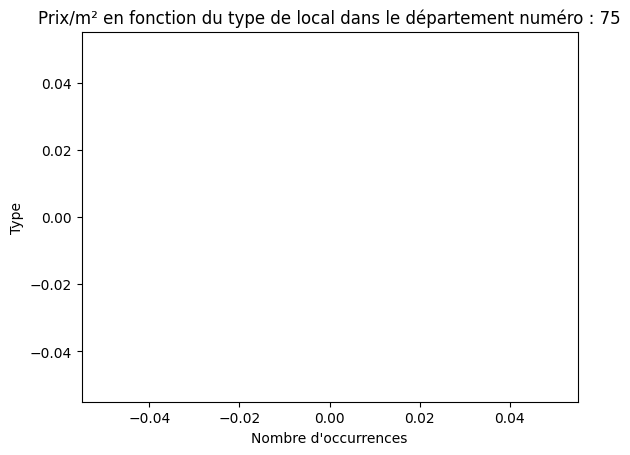

{}


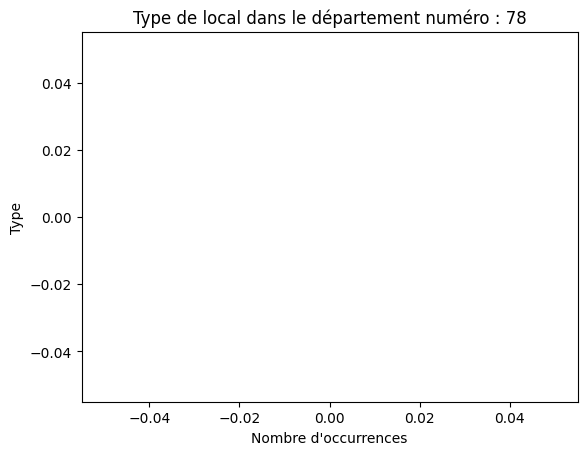

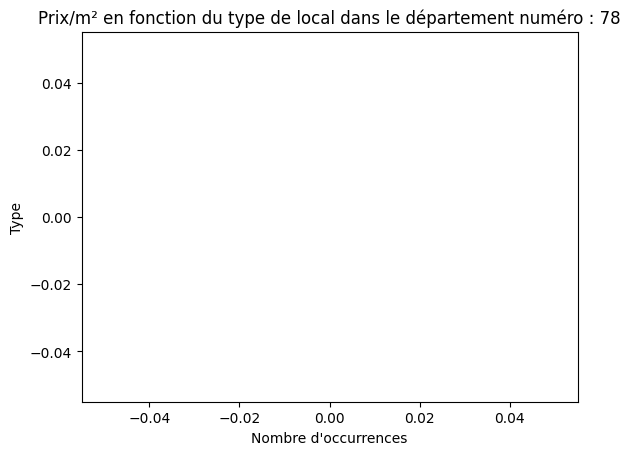

{}


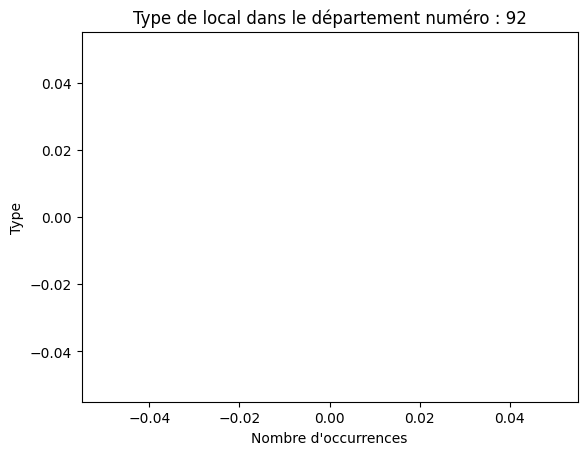

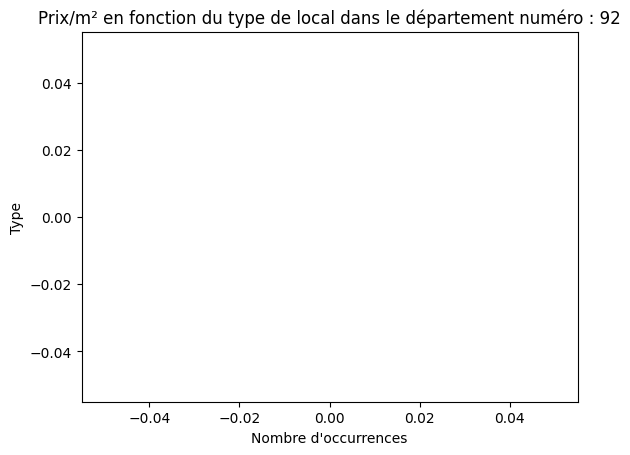

In [23]:
departement = [75,78,92]
data1["Prix/m2"] = data1["PrixInt"]/data1["Surface terrain"]
for j in departement:
    dept_data1 = data1[data1['Code departement'] == int(j)]
    type_counts = dept_data1["Type local"].value_counts()
    type_counts_dict = type_counts.to_dict()
    fig, ax = plt.subplots()
    prixenfonctiondulocal = {}
    for u in type_counts_dict.keys():
        dept_data1type = dept_data1[dept_data1['Type local'] == str(u)]
        prixenfonctiondulocal[u] = dept_data1type["Prix/m2"].median()
    print(prixenfonctiondulocal)
    ax.barh(list(type_counts_dict.keys()), list(type_counts_dict.values()))
    ax.set_xlabel("Nombre d'occurrences")
    ax.set_ylabel("Type")
    ax.set_title("Type de local dans le département numéro : "+str(j))
    plt.show()
    fig, ax = plt.subplots()
    ax.barh(list(prixenfonctiondulocal.keys()), list(prixenfonctiondulocal.values()))
    ax.set_xlabel("Nombre d'occurrences")
    ax.set_ylabel("Type")
    ax.set_title("Prix/m² en fonction du type de local dans le département numéro : "+str(j))
    plt.show()

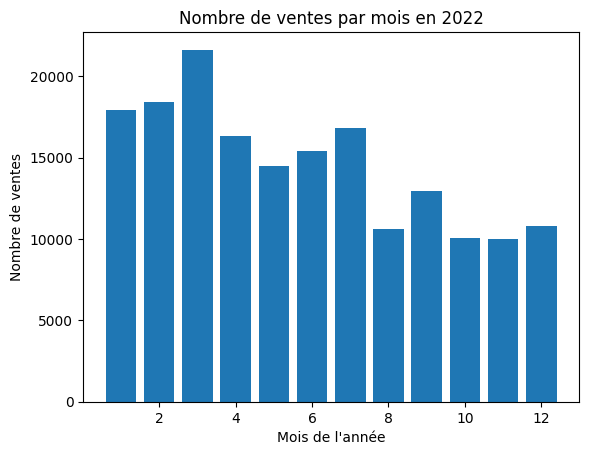

In [25]:
ventes_par_mois = {}
for _, row in data1.iterrows():
    date_str = row['Date mutation']
    valeur_fonciere = row['Valeur fonciere']
    if isinstance(date_str, str) and isinstance(valeur_fonciere, str): # s'assurer que les champs contiennent des données valides
        date = datetime.strptime(date_str, '%d/%m/%Y')
        mois = date.month
        if mois not in ventes_par_mois:
            ventes_par_mois[mois] = 1
        else:
            ventes_par_mois[mois] += 1

mois = []
ventes = []
for k, v in ventes_par_mois.items():
    mois.append(k)
    ventes.append(v)

plt.bar(mois, ventes)
plt.xlabel('Mois de l\'année')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par mois en 2022')
plt.show()

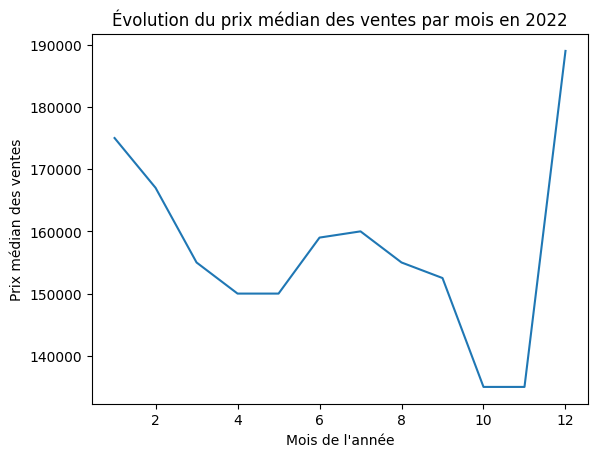

In [26]:
# Convertir la colonne "Date mutation" en objet datetime
data1["Date mutation"] = pd.to_datetime(data1["Date mutation"], format="%d/%m/%Y")

# Créer une colonne "Mois" qui contient le mois de chaque vente
data1["Mois"] = data1["Date mutation"].dt.month

# Calculer le prix médian des ventes pour chaque mois de l'année
prix_median = data1.groupby("Mois")["Valeur fonciere"].median()

# Tracer le graphique de l'évolution du prix médian en fonction du mois
plt.plot(prix_median.index, prix_median.values)
plt.xlabel('Mois de l\'année')
plt.ylabel('Prix médian des ventes')
plt.title('Évolution du prix médian des ventes par mois en 2022')
plt.show()

'\nreprésente la répartition des différents types de locaux pour les biens immobiliers dans votre \nensemble de données. Voici une explication de chaque élément du camembert :\n\n"Appartement" : Cela indique la proportion d\'appartements parmi tous les biens immobiliers présents\n dans les données.\n"Maison" : Cela représente la proportion de maisons parmi tous les biens immobiliers.\n"Dépendance" : Cela représente la proportion de dépendances (par exemple, des garages ou des \n  annexes) parmi tous les biens immobiliers.\n"Local industriel. commercial ou assimilé" : Cela indique la proportion de locaux industriels,\n  commerciaux ou assimilés (par exemple, des entrepôts ou des magasins) parmi tous les biens\n  immobiliers.\n"Local industriel. commercial ou assimilé + appartement" : Cela représente la proportion de biens \n  immobiliers qui sont une combinaison d\'un local industriel, commercial ou assimilé et d\'un \n  appartement.\n"Dépendance + maison" : Cela indique la proportion d

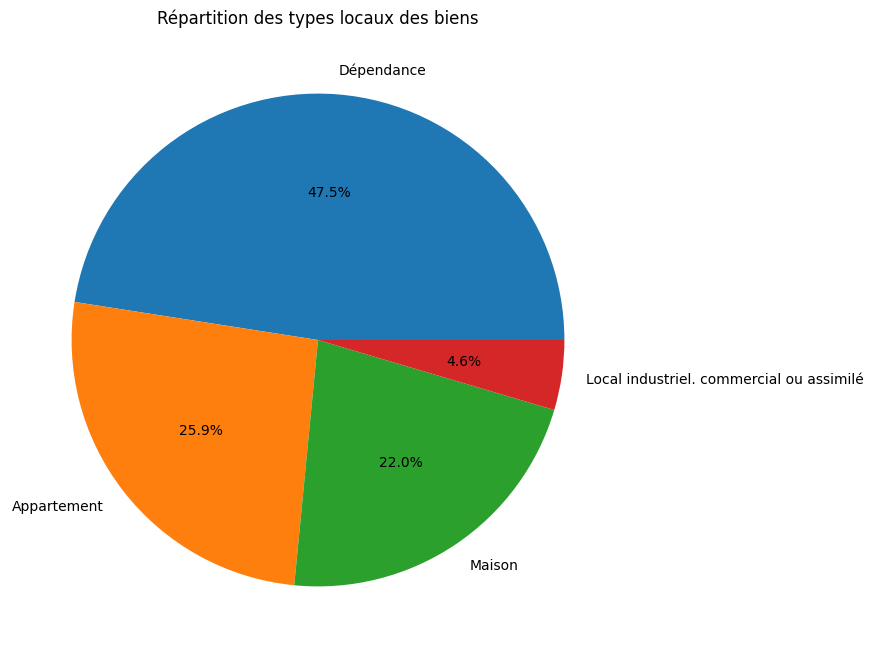

In [27]:
# Camemberts : Répartition des types locaux des biens
plt.figure(figsize=(8, 8))
data1["Type local"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Répartition des types locaux des biens")

"""
représente la répartition des différents types de locaux pour les biens immobiliers dans votre 
ensemble de données. Voici une explication de chaque élément du camembert :

"Appartement" : Cela indique la proportion d'appartements parmi tous les biens immobiliers présents
 dans les données.
"Maison" : Cela représente la proportion de maisons parmi tous les biens immobiliers.
"Dépendance" : Cela représente la proportion de dépendances (par exemple, des garages ou des 
  annexes) parmi tous les biens immobiliers.
"Local industriel. commercial ou assimilé" : Cela indique la proportion de locaux industriels,
  commerciaux ou assimilés (par exemple, des entrepôts ou des magasins) parmi tous les biens
  immobiliers.
"Local industriel. commercial ou assimilé + appartement" : Cela représente la proportion de biens 
  immobiliers qui sont une combinaison d'un local industriel, commercial ou assimilé et d'un 
  appartement.
"Dépendance + maison" : Cela indique la proportion de biens immobiliers qui sont une combinaison 
  d'une dépendance et d'une maison.
Le camembert donne une vue d'ensemble visuelle de la répartition des types locaux des biens 
immobiliers dans vos données. Il vous permet de voir la proportion relative de chaque type de bien,
ce qui peut être utile pour comprendre la composition générale de votre ensemble de données et 
identifier les tendances ou les prédominances.
"""

<Figure size 1000x600 with 0 Axes>

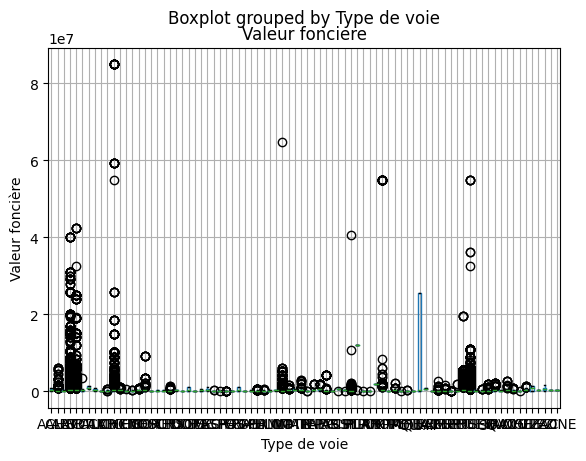

'\npermet de visualiser la répartition de la valeur foncière en fonction du type de voie dans votre \nensemble de données.\n\nVoici une explication des éléments clés de la boîte à moustaches :\n\nLa boîte représente l\'étendue interquartile (IQR) des données, c\'est-à-dire la plage où se situent\nles 50 % centraux des valeurs. Elle s\'étend du premier quartile (Q1) au troisième quartile (Q3). La \nlongueur de la boîte représente la dispersion des valeurs dans cette plage.\nLa ligne à l\'intérieur de la boîte représente la médiane, qui indique la valeur qui divise la \ndistribution en deux parties égales.\nLes "moustaches" s\'étendent à partir de la boîte jusqu\'aux valeurs situées à l\'extérieur de \nl\'étendue interquartile. Elles peuvent représenter des valeurs aberrantes ou des valeurs extrêmes \nqui se trouvent au-delà de la plage des 1,5 fois l\'IQR.\nLes points individuels situés en dehors des moustaches sont des valeurs aberrantes, considérées \ncomme des observations atypiques.

In [28]:
# Convertir la colonne "Valeur fonciere" en nombre
data1["Valeur fonciere"] = pd.to_numeric(data1["Valeur fonciere"], errors="coerce")

# Graphique 1 : Boîtes à moustaches pour la valeur foncière par type de voie
plt.figure(figsize=(10, 6))
data1.boxplot(column="Valeur fonciere", by="Type de voie")
plt.xlabel("Type de voie")
plt.ylabel("Valeur foncière")

# Afficher le graphique
plt.show()

"""
permet de visualiser la répartition de la valeur foncière en fonction du type de voie dans votre 
ensemble de données.

Voici une explication des éléments clés de la boîte à moustaches :

La boîte représente l'étendue interquartile (IQR) des données, c'est-à-dire la plage où se situent
les 50 % centraux des valeurs. Elle s'étend du premier quartile (Q1) au troisième quartile (Q3). La 
longueur de la boîte représente la dispersion des valeurs dans cette plage.
La ligne à l'intérieur de la boîte représente la médiane, qui indique la valeur qui divise la 
distribution en deux parties égales.
Les "moustaches" s'étendent à partir de la boîte jusqu'aux valeurs situées à l'extérieur de 
l'étendue interquartile. Elles peuvent représenter des valeurs aberrantes ou des valeurs extrêmes 
qui se trouvent au-delà de la plage des 1,5 fois l'IQR.
Les points individuels situés en dehors des moustaches sont des valeurs aberrantes, considérées 
comme des observations atypiques.
En interprétant le graphique, vous pouvez comparer la médiane et la dispersion de la valeur foncière
pour chaque type de voie. Vous pouvez également identifier la présence de valeurs aberrantes ou 
extrêmes qui pourraient influencer la distribution. Cela peut fournir des informations utiles sur 
les variations de la valeur foncière en fonction du type de voie dans votre ensemble de données.
"""

'\npermet de visualiser la répartition de la valeur foncière en fonction du type de local dans votre\nensemble de données.\n\nVoici une explication des éléments clés de la boîte à moustaches :\n\nLa boîte représente l\'étendue interquartile (IQR) des données, c\'est-à-dire la plage où se situent \nles 50 % centraux des valeurs. Elle s\'étend du premier quartile (Q1) au troisième quartile (Q3). La\nlongueur de la boîte représente la dispersion des valeurs dans cette plage.\nLa ligne à l\'intérieur de la boîte représente la médiane, qui indique la valeur qui divise la \nistribution en deux parties égales.\nLes "moustaches" s\'étendent à partir de la boîte jusqu\'aux valeurs situées à l\'extérieur de \nl\'étendue interquartile. Elles peuvent représenter des valeurs aberrantes ou des valeurs extrêmes \nqui se trouvent au-delà de la plage des 1,5 fois l\'IQR.\nLes points individuels situés en dehors des moustaches sont des valeurs aberrantes, considérées \ncomme des observations atypiques.\

<Figure size 1000x600 with 0 Axes>

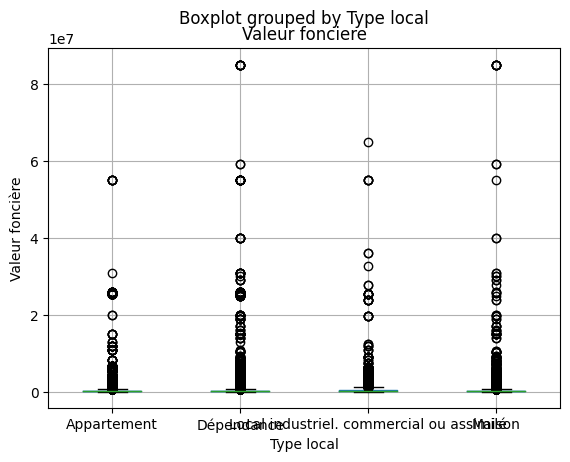

In [29]:
  # Boîtes à moustaches pour la valeur foncière par type local
  plt.figure(figsize=(10, 6))
  data1.boxplot(column="Valeur fonciere", by="Type local")
  plt.xlabel("Type local")
  plt.ylabel("Valeur foncière")
  


  """
  permet de visualiser la répartition de la valeur foncière en fonction du type de local dans votre
  ensemble de données.

  Voici une explication des éléments clés de la boîte à moustaches :

  La boîte représente l'étendue interquartile (IQR) des données, c'est-à-dire la plage où se situent 
  les 50 % centraux des valeurs. Elle s'étend du premier quartile (Q1) au troisième quartile (Q3). La
  longueur de la boîte représente la dispersion des valeurs dans cette plage.
  La ligne à l'intérieur de la boîte représente la médiane, qui indique la valeur qui divise la 
  istribution en deux parties égales.
  Les "moustaches" s'étendent à partir de la boîte jusqu'aux valeurs situées à l'extérieur de 
  l'étendue interquartile. Elles peuvent représenter des valeurs aberrantes ou des valeurs extrêmes 
  qui se trouvent au-delà de la plage des 1,5 fois l'IQR.
  Les points individuels situés en dehors des moustaches sont des valeurs aberrantes, considérées 
  comme des observations atypiques.
  En interprétant le graphique, vous pouvez comparer la médiane et la dispersion de la valeur foncière 
  pour chaque type de local. Vous pouvez également identifier la présence de valeurs aberrantes ou 
  extrêmes qui pourraient influencer la distribution. Cela peut fournir des informations utiles sur 
  les variations de la valeur foncière en fonction du type de local dans votre ensemble de données.
  """

'\nReprésente la répartition des types de culture des terrains à partir des données fournies dans le \ndocument. Chaque portion du camembert représente un type de culture spécifique, et la taille de \nchaque portion est proportionnelle à la fréquence d\'apparition de ce type de culture dans les \ndonnées.\nLe camembert affiche visuellement la répartition de ces types de culture en utilisant des portions \ncirculaires. Chaque portion est étiquetée avec le nom du type de culture et le pourcentage \ncorrespondant à la fréquence d\'apparition de ce type de culture par rapport au total.\n\nPar exemple, si le camembert indique "Agriculture: 40.0%", cela signifie que le type de culture \n"Agriculture" représente 40% de la répartition totale des types de culture des terrains.\n\n'

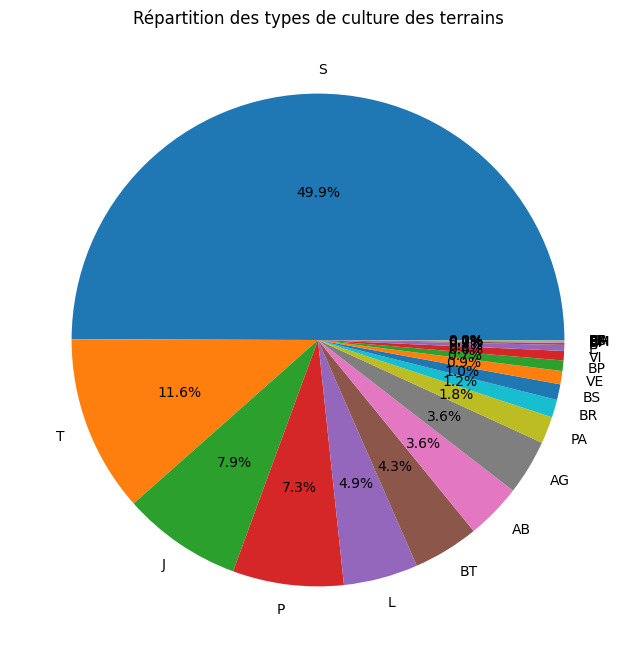

In [30]:
# Camemberts : Répartition des types de culture des terrains
plt.figure(figsize=(8, 8))
data1["Nature culture"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Répartition des types de culture des terrains")

"""
Représente la répartition des types de culture des terrains à partir des données fournies dans le 
document. Chaque portion du camembert représente un type de culture spécifique, et la taille de 
chaque portion est proportionnelle à la fréquence d'apparition de ce type de culture dans les 
données.
Le camembert affiche visuellement la répartition de ces types de culture en utilisant des portions 
circulaires. Chaque portion est étiquetée avec le nom du type de culture et le pourcentage 
correspondant à la fréquence d'apparition de ce type de culture par rapport au total.

Par exemple, si le camembert indique "Agriculture: 40.0%", cela signifie que le type de culture 
"Agriculture" représente 40% de la répartition totale des types de culture des terrains.

"""

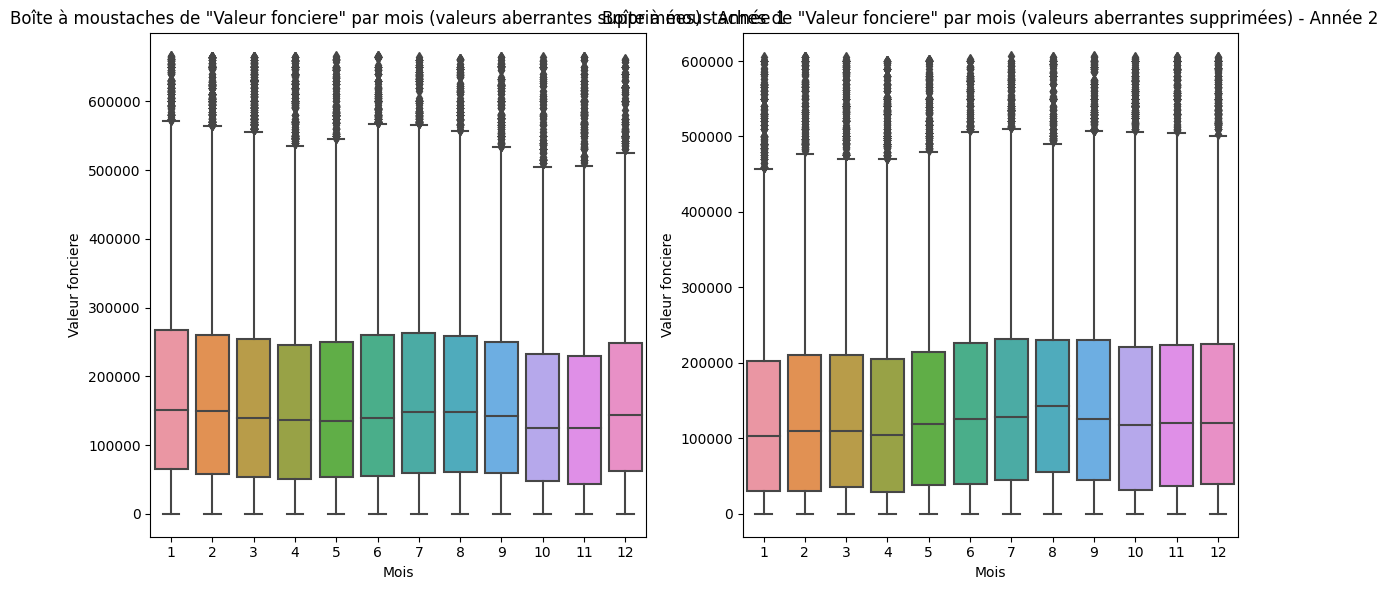

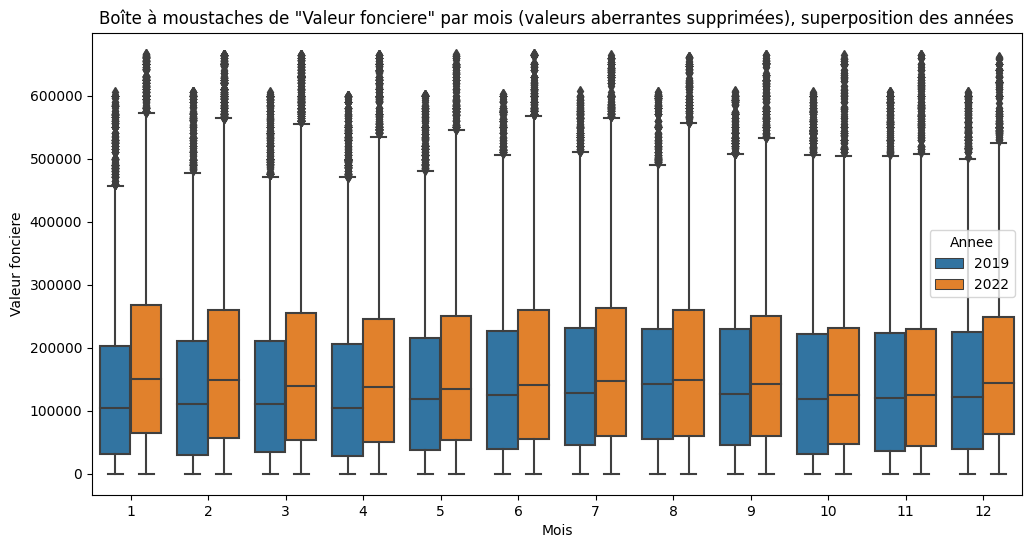

In [31]:
# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# Calculer l'IQR pour 'Valeur fonciere' dans les deux jeux de données
Q1_1 = data1_sample['Valeur fonciere'].quantile(0.25)
Q3_1 = data1_sample['Valeur fonciere'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2_sample['Valeur fonciere'].quantile(0.25)
Q3_2 = data2_sample['Valeur fonciere'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# Définir les limites pour les valeurs aberrantes dans les deux jeux de données
limite_inferieure_1 = Q1_1 - 1.5 * IQR_1
limite_superieure_1 = Q3_1 + 1.5 * IQR_1

limite_inferieure_2 = Q1_2 - 1.5 * IQR_2
limite_superieure_2 = Q3_2 + 1.5 * IQR_2

# Filtrer les données
donnees_filtrees_1 = data1_sample[(data1_sample['Valeur fonciere'] >= limite_inferieure_1) & (data1_sample['Valeur fonciere'] <= limite_superieure_1)]
donnees_filtrees_2 = data2_sample[(data2_sample['Valeur fonciere'] >= limite_inferieure_2) & (data2_sample['Valeur fonciere'] <= limite_superieure_2)]

# Créer les boîtes à moustaches
plt.figure(figsize=(12,6))

# Boîte à moustaches pour la première année
plt.subplot(1, 2, 1)
sns.boxplot(x='Mois', y='Valeur fonciere', data=donnees_filtrees_1)
plt.title('Boîte à moustaches de "Valeur fonciere" par mois (valeurs aberrantes supprimées) - Année 1')

# Boîte à moustaches pour la deuxième année
plt.subplot(1, 2, 2)
sns.boxplot(x='Mois', y='Valeur fonciere', data=donnees_filtrees_2)
plt.title('Boîte à moustaches de "Valeur fonciere" par mois (valeurs aberrantes supprimées) - Année 2')

plt.tight_layout()
plt.show()

# Concaténer les données filtrées
donnees_filtrees = pd.concat([donnees_filtrees_1, donnees_filtrees_2])

# Créer une nouvelle colonne 'Année' dans les données filtrées
donnees_filtrees['Annee'] = donnees_filtrees['Date mutation'].dt.year

# Créer la boîte à moustaches
plt.figure(figsize=(12,6))
sns.boxplot(x='Mois', y='Valeur fonciere', hue='Annee', data=donnees_filtrees)
plt.title('Boîte à moustaches de "Valeur fonciere" par mois (valeurs aberrantes supprimées), superposition des années')
plt.show()

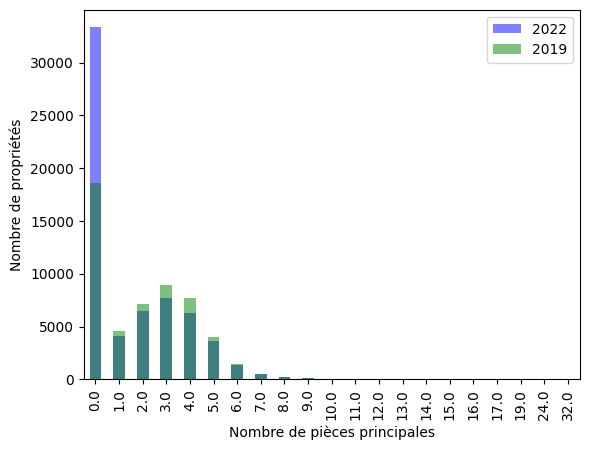

In [32]:
#Diagramme en barres du Nombre de Pièces Principales : Cela peut montrer la distribution du nombre de pièces parmi les propriétés.
data1_sample['Nombre pieces principales'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, label="2022")
data2_sample['Nombre pieces principales'].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.5, label="2019")
plt.xlabel('Nombre de pièces principales')
plt.ylabel('Nombre de propriétés')
plt.legend(loc='upper right')
plt.show()

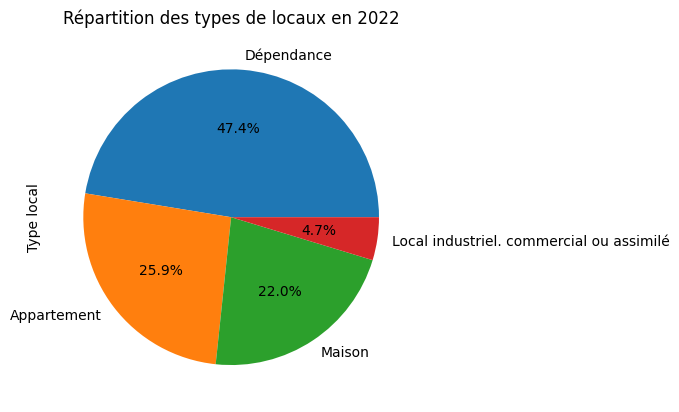

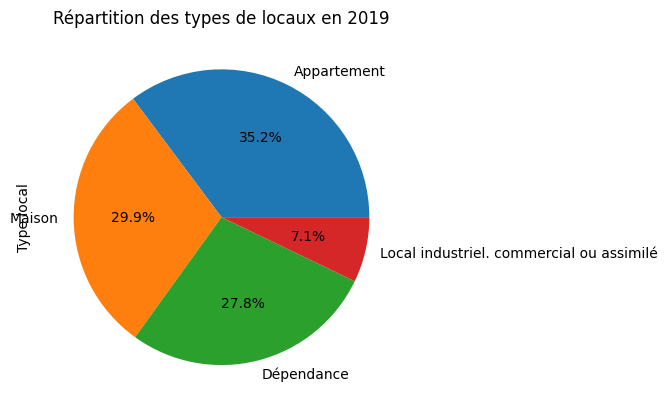

In [33]:
#Diagramme en Camembert du Type Local : Cela peut montrer la répartition des types de propriétés (appartement, maison, etc.) dans l'ensemble de données.
data1_sample['Type local'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des types de locaux en 2022')
plt.show()

data2_sample['Type local'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des types de locaux en 2019')


plt.show()


<ipython-input-34-32d8a993340c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrée['Mois'] = data_filtrée['Date mutation'].dt.month


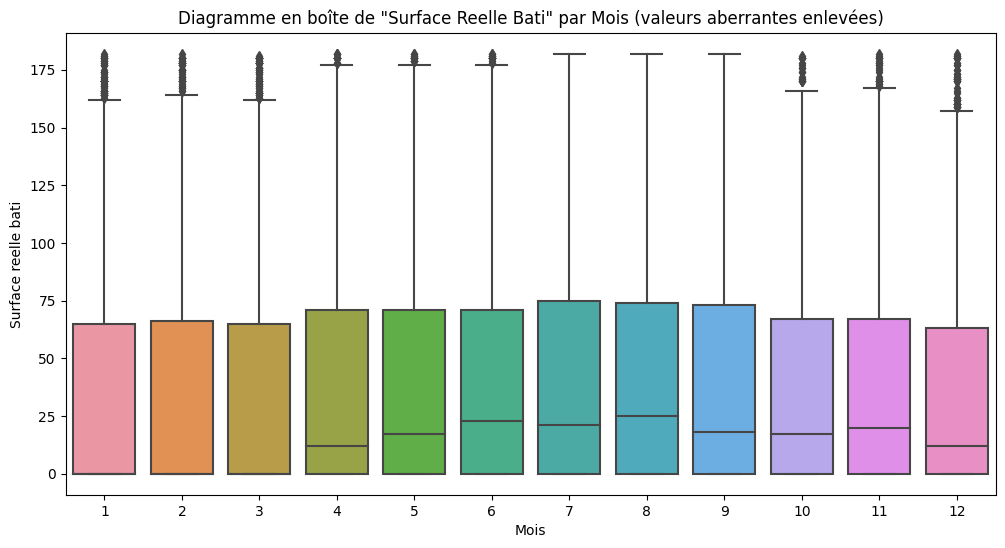

<ipython-input-34-32d8a993340c>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrée['Mois'] = data_filtrée['Date mutation'].dt.month


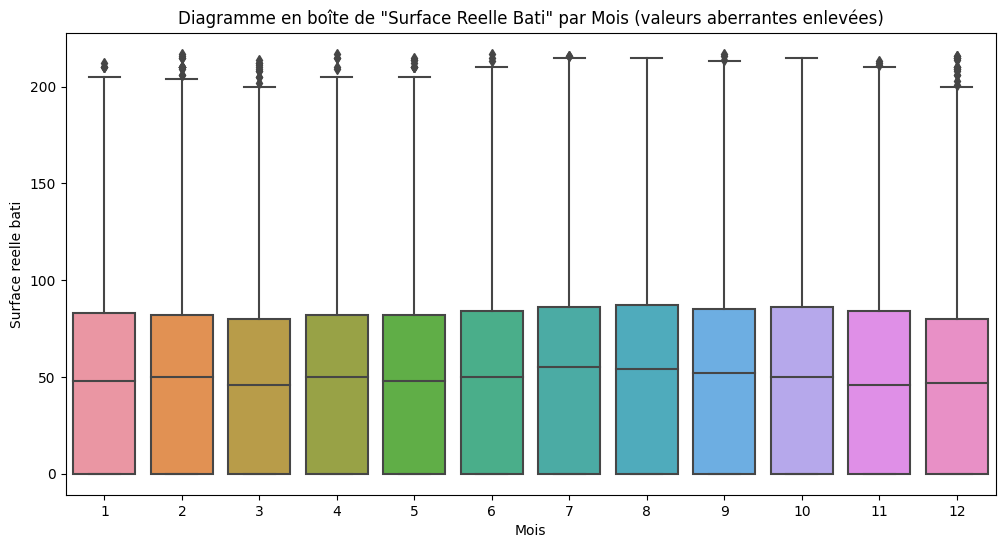

In [34]:
# Convertis 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')

# Calcule l'IQR pour 'Surface reelle bati'
Q1 = data1_sample['Surface reelle bati'].quantile(0.25)
Q3 = data1_sample['Surface reelle bati'].quantile(0.75)
IQR = Q3 - Q1

# Définis les limites pour les valeurs aberrantes
limite_inférieure = Q1 - 1.5 * IQR
limite_supérieure = Q3 + 1.5 * IQR

# Filtre les données
data_filtrée = data1_sample[(data1_sample['Surface reelle bati'] >= limite_inférieure) & (data1_sample['Surface reelle bati'] <= limite_supérieure)]

# Extrait le mois de la colonne 'Date mutation'
data_filtrée['Mois'] = data_filtrée['Date mutation'].dt.month

# Crée le diagramme en boîte
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mois', y='Surface reelle bati', data=data_filtrée)
plt.title('Diagramme en boîte de "Surface Reelle Bati" par Mois (valeurs aberrantes enlevées)')
plt.show()


# Convertis 'Date mutation' en datetime
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Calcule l'IQR pour 'Surface reelle bati'
Q1 = data2_sample['Surface reelle bati'].quantile(0.25)
Q3 = data2_sample['Surface reelle bati'].quantile(0.75)
IQR = Q3 - Q1

# Définis les limites pour les valeurs aberrantes
limite_inférieure = Q1 - 1.5 * IQR
limite_supérieure = Q3 + 1.5 * IQR

# Filtre les données
data_filtrée = data2_sample[(data2_sample['Surface reelle bati'] >= limite_inférieure) & (data2_sample['Surface reelle bati'] <= limite_supérieure)]

# Extrait le mois de la colonne 'Date mutation'
data_filtrée['Mois'] = data_filtrée['Date mutation'].dt.month

# Crée le diagramme en boîte
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mois', y='Surface reelle bati', data=data_filtrée)
plt.title('Diagramme en boîte de "Surface Reelle Bati" par Mois (valeurs aberrantes enlevées)')
plt.show()

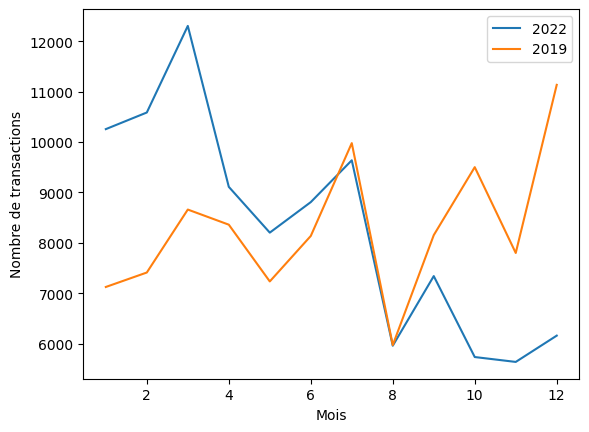

In [35]:
# Convert 'Date mutation' column to datetime type
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'])
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'])

# Extraire le mois de la colonne 'Date mutation'
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

# Tracer les courbes du nombre de transactions par mois
data1_sample.groupby('Month')['Valeur fonciere'].count().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Valeur fonciere'].count().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.legend()
plt.show()

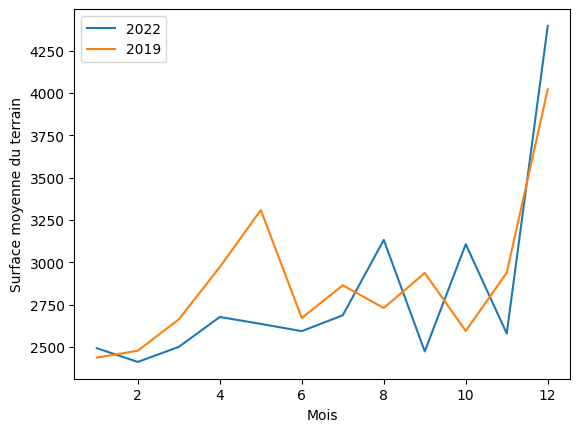

In [36]:
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

data1_sample.groupby('Month')['Surface terrain'].mean().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Surface terrain'].mean().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Surface moyenne du terrain')
plt.legend()
plt.show()

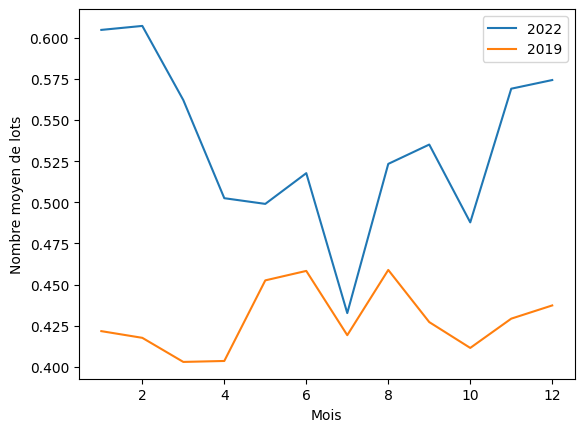

In [37]:
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

data1_sample.groupby('Month')['Nombre de lots'].mean().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Nombre de lots'].mean().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Nombre moyen de lots')
plt.legend()
plt.show()

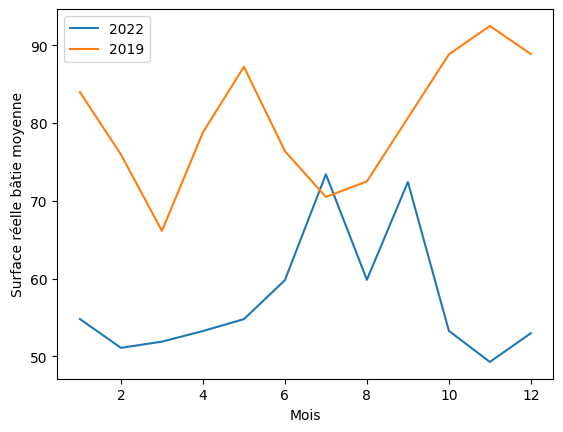

In [38]:
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

data1_sample.groupby('Month')['Surface reelle bati'].mean().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Surface reelle bati'].mean().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Surface réelle bâtie moyenne')
plt.legend()
plt.show()

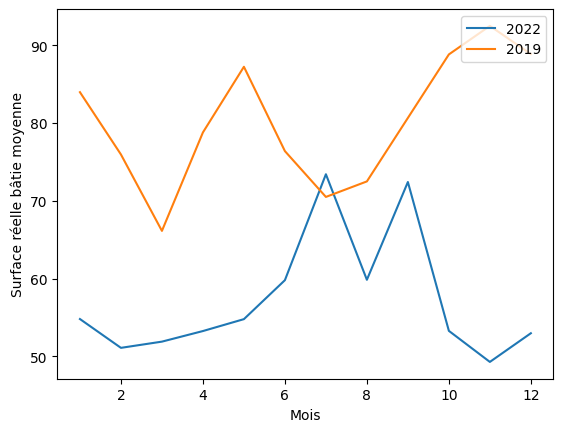

In [39]:
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

data1_sample.groupby('Month')['Surface reelle bati'].mean().plot(kind='line', label='2022')
data2_sample.groupby('Month')['Surface reelle bati'].mean().plot(kind='line', label='2019')
plt.xlabel('Mois')
plt.ylabel('Surface réelle bâtie moyenne')
plt.legend(loc='upper right')
plt.show()

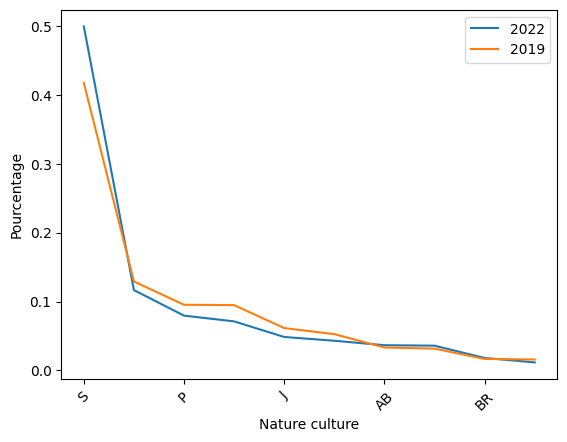

In [40]:
# 2022 data
nature_culture_2022 = data1_sample['Nature culture'].value_counts(normalize=True).sort_values(ascending=False).head(10)
nature_culture_2022.plot(kind='line', label='2022')

# 2019 data
nature_culture_2019 = data2_sample['Nature culture'].value_counts(normalize=True).sort_values(ascending=False).head(10)
nature_culture_2019.plot(kind='line', label='2019')

plt.xlabel('Nature culture')
plt.ylabel('Pourcentage')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

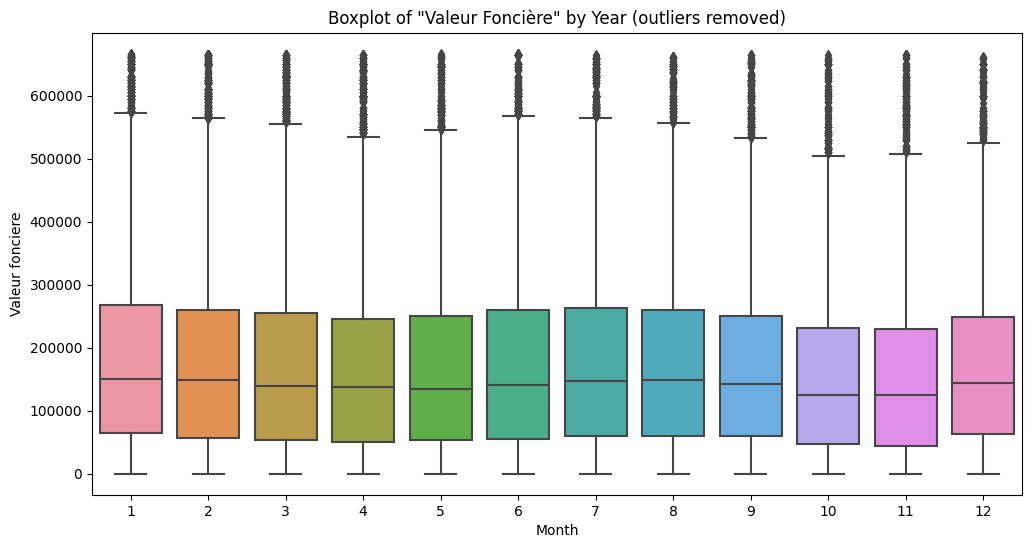

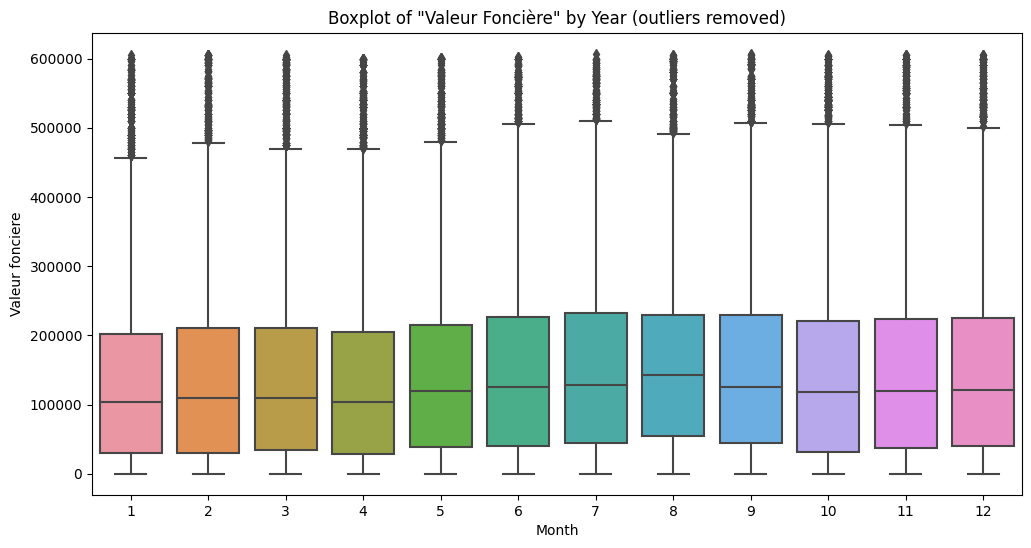

In [41]:
# Convertit 'Valeur fonciere' de string à float
#data1_sample['Valeur fonciere'] = data1_sample['Valeur fonciere'].str.replace(',', '.').astype(float)

Q1 = data1_sample['Valeur fonciere'].quantile(0.25)
Q3 = data1_sample['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

filtered_data = data1_sample[(data1_sample['Valeur fonciere'] >= lower_limit) & (data1_sample['Valeur fonciere'] <= upper_limit)]

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Valeur fonciere', data=filtered_data)
plt.title('Boxplot of "Valeur Foncière" by Year (outliers removed)')
plt.show()

Q1 = data2_sample['Valeur fonciere'].quantile(0.25)
Q3 = data2_sample['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#Filtration
filtered_data = data2_sample[(data2_sample['Valeur fonciere'] >= lower_limit) & (data2_sample['Valeur fonciere'] <= upper_limit)]

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Valeur fonciere', data=filtered_data)
plt.title('Boxplot of "Valeur Foncière" by Year (outliers removed)')
plt.show()

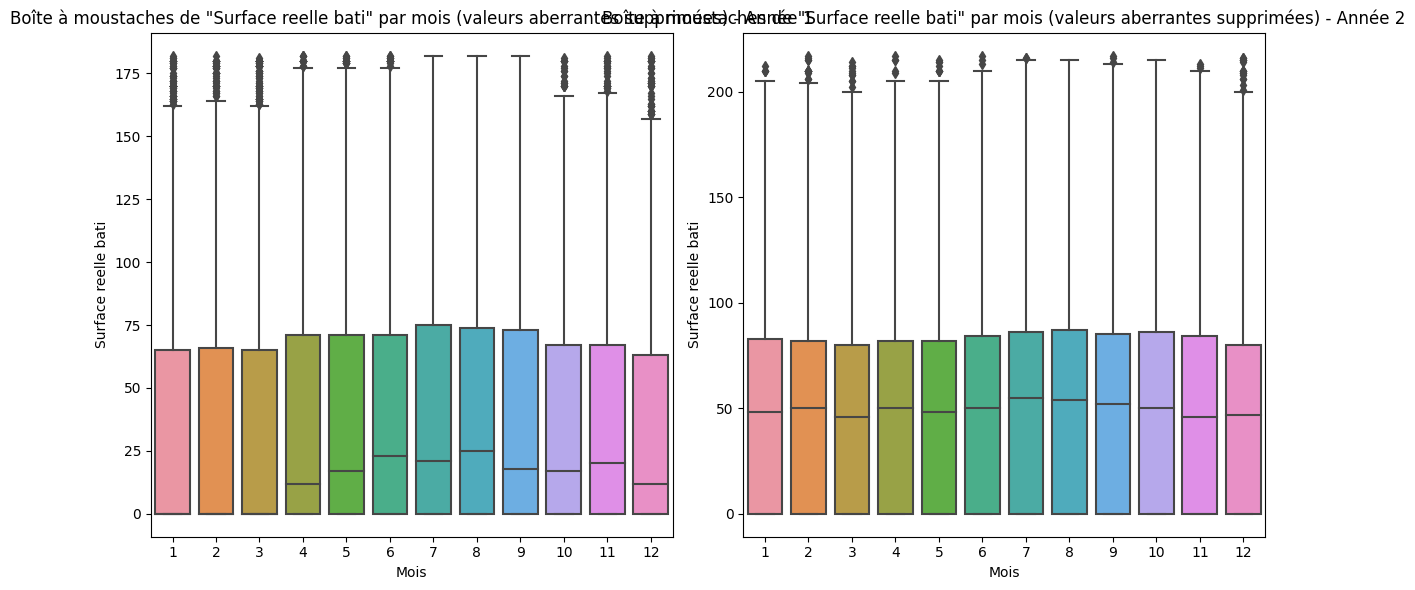

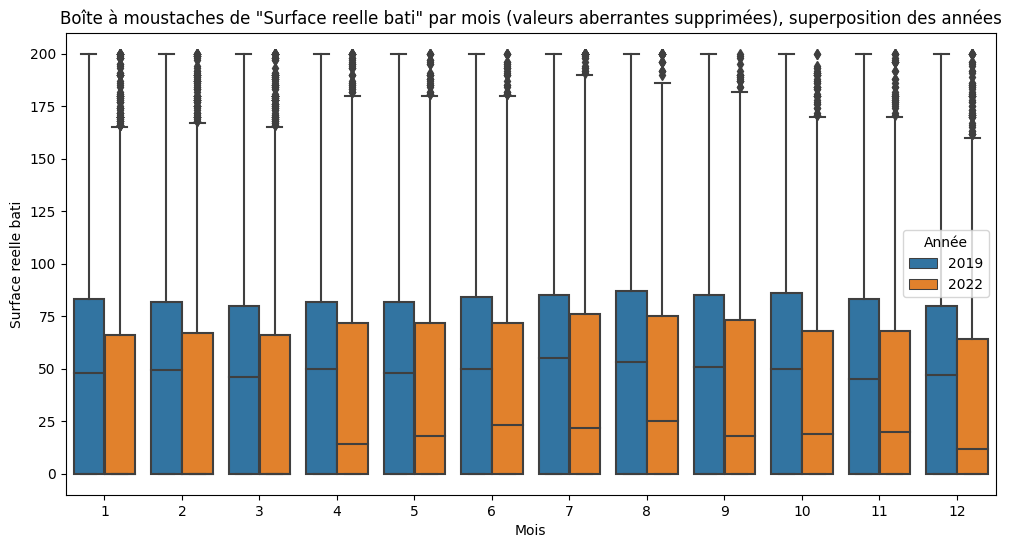

In [42]:
# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# Calculer l'IQR pour 'Surface reelle bati' dans les deux jeux de données
Q1_1 = data1_sample['Surface reelle bati'].quantile(0.25)
Q3_1 = data1_sample['Surface reelle bati'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2_sample['Surface reelle bati'].quantile(0.25)
Q3_2 = data2_sample['Surface reelle bati'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# Définir les limites pour les valeurs aberrantes dans les deux jeux de données
limite_inferieure_1 = Q1_1 - 1.5 * IQR_1
limite_superieure_1 = Q3_1 + 1.5 * IQR_1

limite_inferieure_2 = Q1_2 - 1.5 * IQR_2
limite_superieure_2 = Q3_2 + 1.5 * IQR_2

# Filtrer les données
donnees_filtrees_1 = data1_sample[(data1_sample['Surface reelle bati'] >= limite_inferieure_1) & (data1_sample['Surface reelle bati'] <= limite_superieure_1)]
donnees_filtrees_2 = data2_sample[(data2_sample['Surface reelle bati'] >= limite_inferieure_2) & (data2_sample['Surface reelle bati'] <= limite_superieure_2)]

# Créer les boîtes à moustaches
plt.figure(figsize=(12,6))

# Boîte à moustaches pour la première année
plt.subplot(1, 2, 1)
sns.boxplot(x='Mois', y='Surface reelle bati', data=donnees_filtrees_1)
plt.title('Boîte à moustaches de "Surface reelle bati" par mois (valeurs aberrantes supprimées) - Année 1')

# Boîte à moustaches pour la deuxième année
plt.subplot(1, 2, 2)
sns.boxplot(x='Mois', y='Surface reelle bati', data=donnees_filtrees_2)
plt.title('Boîte à moustaches de "Surface reelle bati" par mois (valeurs aberrantes supprimées) - Année 2')

plt.tight_layout()
plt.show()

# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# Ajouter une colonne 'Année'
data1_sample['Année'] = data1_sample['Date mutation'].dt.year
data2_sample['Année'] = data2_sample['Date mutation'].dt.year

# Concaténer les deux ensembles de données
donnees_concatenees = pd.concat([data1_sample, data2_sample])

# Calculer l'IQR pour 'Surface reelle bati'
Q1 = donnees_concatenees['Surface reelle bati'].quantile(0.25)
Q3 = donnees_concatenees['Surface reelle bati'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
limite_inferieure = Q1 - 1.5 * IQR
limite_superieure = Q3 + 1.5 * IQR

# Filtrer les données
donnees_filtrees = donnees_concatenees[(donnees_concatenees['Surface reelle bati'] >= limite_inferieure) & (donnees_concatenees['Surface reelle bati'] <= limite_superieure)]

# Créer la boîte à moustaches
plt.figure(figsize=(12,6))
sns.boxplot(x='Mois', y='Surface reelle bati', hue='Année', data=donnees_filtrees)
plt.title('Boîte à moustaches de "Surface reelle bati" par mois (valeurs aberrantes supprimées), superposition des années')
plt.show()

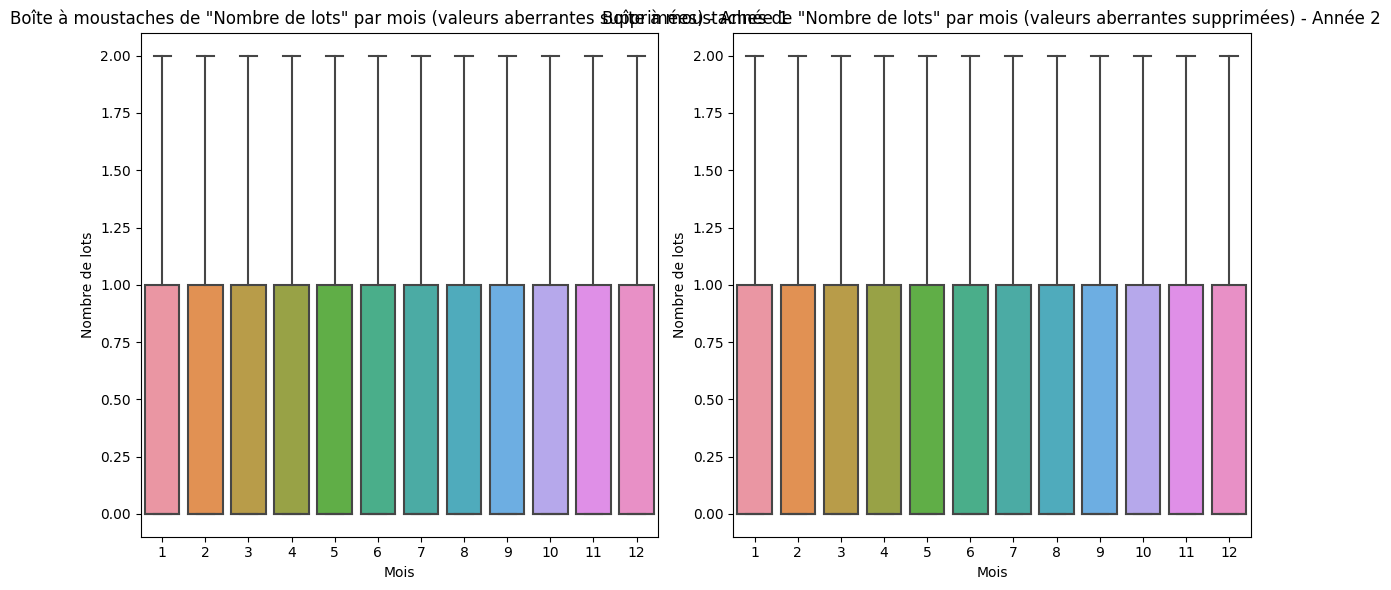

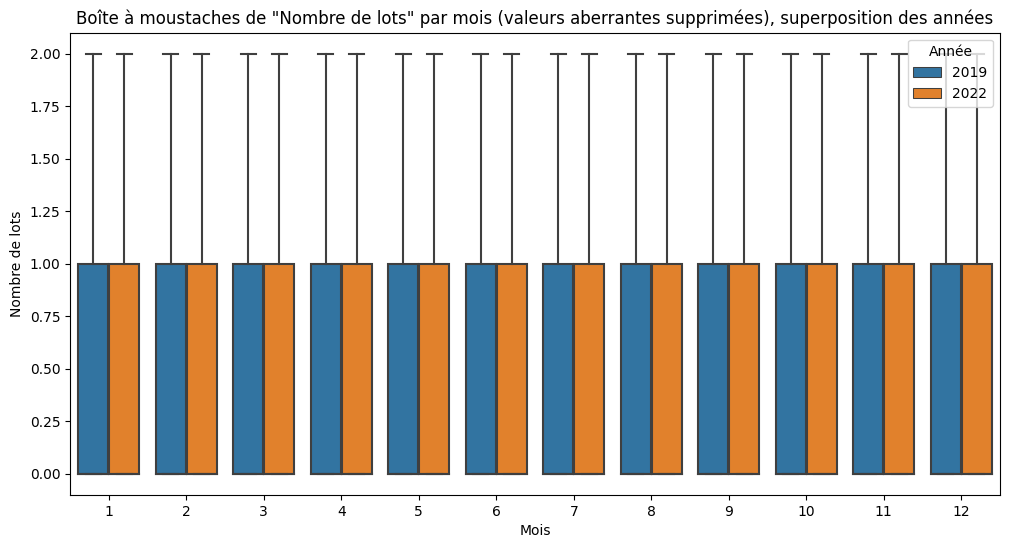

In [43]:
# On convertit 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# On ajoute la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# On calcule l'IQR pour 'Nombre de lots' dans les deux jeux de données
Q1_1 = data1_sample['Nombre de lots'].quantile(0.25)
Q3_1 = data1_sample['Nombre de lots'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2_sample['Nombre de lots'].quantile(0.25)
Q3_2 = data2_sample['Nombre de lots'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# On définit les limites pour les valeurs aberrantes dans les deux jeux de données
limite_inferieure_1 = Q1_1 - 1.5 * IQR_1
limite_superieure_1 = Q3_1 + 1.5 * IQR_1

limite_inferieure_2 = Q1_2 - 1.5 * IQR_2
limite_superieure_2 = Q3_2 + 1.5 * IQR_2

# On filtre les données
donnees_filtrees_1 = data1_sample[(data1_sample['Nombre de lots'] >= limite_inferieure_1) & (data1_sample['Nombre de lots'] <= limite_superieure_1)]
donnees_filtrees_2 = data2_sample[(data2_sample['Nombre de lots'] >= limite_inferieure_2) & (data2_sample['Nombre de lots'] <= limite_superieure_2)]

# On crée les boîtes à moustaches
plt.figure(figsize=(12,6))

# Boîte à moustaches pour la première année
plt.subplot(1, 2, 1)
sns.boxplot(x='Mois', y='Nombre de lots', data=donnees_filtrees_1)
plt.title('Boîte à moustaches de "Nombre de lots" par mois (valeurs aberrantes supprimées) - Année 1')

# Boîte à moustaches pour la deuxième année
plt.subplot(1, 2, 2)
sns.boxplot(x='Mois', y='Nombre de lots', data=donnees_filtrees_2)
plt.title('Boîte à moustaches de "Nombre de lots" par mois (valeurs aberrantes supprimées) - Année 2')

plt.tight_layout()
plt.show()

# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month
# Ajouter une colonne 'Année'
data1_sample['Année'] = data1_sample['Date mutation'].dt.year
data2_sample['Année'] = data2_sample['Date mutation'].dt.year

# Concaténer les deux ensembles de données
donnees_concatenees = pd.concat([data1_sample, data2_sample])

# Calculer l'IQR pour 'Nombre de lots'
Q1 = donnees_concatenees['Nombre de lots'].quantile(0.25)
Q3 = donnees_concatenees['Nombre de lots'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
limite_inferieure = Q1 - 1.5 * IQR
limite_superieure = Q3 + 1.5 * IQR

# Filtrer les données
donnees_filtrees = donnees_concatenees[(donnees_concatenees['Nombre de lots'] >= limite_inferieure) & (donnees_concatenees['Nombre de lots'] <= limite_superieure)]

# Créer la boîte à moustaches
plt.figure(figsize=(12,6))
sns.boxplot(x='Mois', y='Nombre de lots', hue='Année', data=donnees_filtrees)
plt.title('Boîte à moustaches de "Nombre de lots" par mois (valeurs aberrantes supprimées), superposition des années')
plt.show()

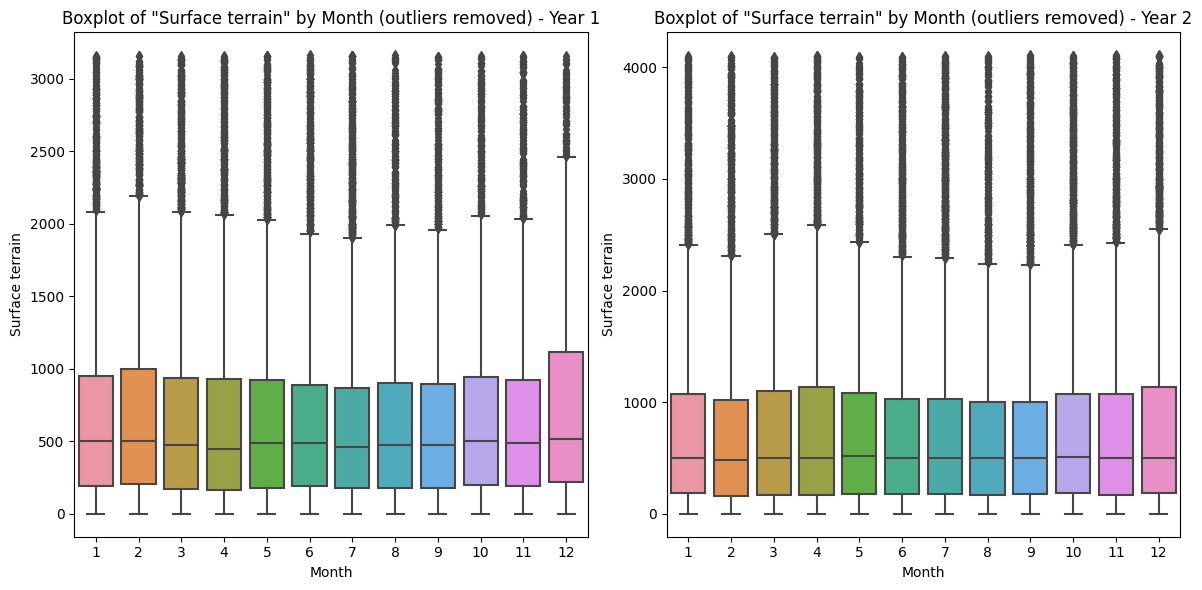

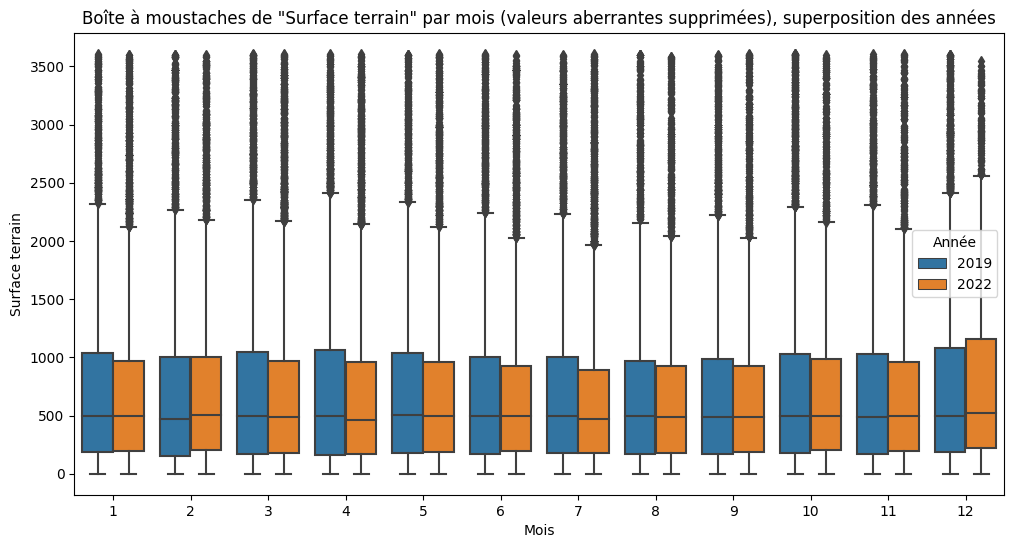

In [44]:
# On convertit 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# On ajoute la colonne 'Mois'
data1_sample['Month'] = data1_sample['Date mutation'].dt.month
data2_sample['Month'] = data2_sample['Date mutation'].dt.month

# On calcule l'IQR pour 'Nombre de lots' dans les deux jeux de données
Q1_1 = data1_sample['Surface terrain'].quantile(0.25)
Q3_1 = data1_sample['Surface terrain'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2_sample['Surface terrain'].quantile(0.25)
Q3_2 = data2_sample['Surface terrain'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# On définit les limites pour les valeurs aberrantes dans les deux jeux de données
lower_limit_1 = Q1_1 - 1.5 * IQR_1
upper_limit_1 = Q3_1 + 1.5 * IQR_1

lower_limit_2 = Q1_2 - 1.5 * IQR_2
upper_limit_2 = Q3_2 + 1.5 * IQR_2

# On filtre les données
filtered_data_1 = data1_sample[(data1_sample['Surface terrain'] >= lower_limit_1) & (data1_sample['Surface terrain'] <= upper_limit_1)]
filtered_data_2 = data2_sample[(data2_sample['Surface terrain'] >= lower_limit_2) & (data2_sample['Surface terrain'] <= upper_limit_2)]

# On crée les boîtes à moustaches
plt.figure(figsize=(12,6))

# Boîte à moustaches pour la prémière année
plt.subplot(1, 2, 1)
sns.boxplot(x='Month', y='Surface terrain', data=filtered_data_1)
plt.title('Boxplot of "Surface terrain" by Month (outliers removed) - Year 1')

# Boîte à moustaches pour la deuxième année
plt.subplot(1, 2, 2)
sns.boxplot(x='Month', y='Surface terrain', data=filtered_data_2)
plt.title('Boxplot of "Surface terrain" by Month (outliers removed) - Year 2')

plt.tight_layout()
plt.show()
# Convertir 'Date mutation' en datetime
data1_sample['Date mutation'] = pd.to_datetime(data1_sample['Date mutation'], format='%d/%m/%Y')
data2_sample['Date mutation'] = pd.to_datetime(data2_sample['Date mutation'], format='%d/%m/%Y')

# Ajouter la colonne 'Mois'
data1_sample['Mois'] = data1_sample['Date mutation'].dt.month
data2_sample['Mois'] = data2_sample['Date mutation'].dt.month

# Ajouter une colonne 'Année'
data1_sample['Année'] = data1_sample['Date mutation'].dt.year
data2_sample['Année'] = data2_sample['Date mutation'].dt.year

# Concaténer les deux ensembles de données
donnees_concatenees = pd.concat([data1_sample, data2_sample])

# Calculer l'IQR pour 'Surface terrain'
Q1 = donnees_concatenees['Surface terrain'].quantile(0.25)
Q3 = donnees_concatenees['Surface terrain'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
limite_inferieure = Q1 - 1.5 * IQR
limite_superieure = Q3 + 1.5 * IQR

# Filtrer les données
donnees_filtrees = donnees_concatenees[(donnees_concatenees['Surface terrain'] >= limite_inferieure) & (donnees_concatenees['Surface terrain'] <= limite_superieure)]

# Créer la boîte à moustaches
plt.figure(figsize=(12,6))
sns.boxplot(x='Mois', y='Surface terrain', hue='Année', data=donnees_filtrees)
plt.title('Boîte à moustaches de "Surface terrain" par mois (valeurs aberrantes supprimées), superposition des années')
plt.show()